In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import os
from xmitgcm import open_mdsdataset
%matplotlib inline
import sys

import mds

In [2]:
plt.rcParams.update({'font.size': 16
    , 'legend.markerscale': 1., 'axes.titlesize': 16, 'axes.labelsize' : 16,
      'legend.fontsize' : 14,'legend.handlelength': 3})

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

color2 = '#6495ed'
color1 = '#ff6347'
color5 = '#8470ff'
color3 = '#3cb371'
color4 = '#ffd700'
color6 = '#ba55d3'


In [3]:
dirold = '/central/groups/oceanphysics/anirban/NA/inputfiles/NA_2160/NA_2160/input_ll1815/'
#dirnew7 = '/central/groups/oceanphysics/anirban/tideBC_tpxo7/'
dirnew = '/central/groups/oceanphysics/anirban/tideBC_tpxo8/'
dir908 = '/central/groups/oceanphysics/anirban/NA/experiments/ll908_01/'

In [5]:
f = open(dirold+'bathy.bin', 'rb')
bathy = np.fromfile(f, '>f4')
bathy.shape = (532,1815)


fnew = open(dir908+'bathy.bin', 'rb')
bathy908 = np.fromfile(fnew, '>f4')
bathy908.shape = (266,908)

In [18]:
fnew = open(dir908+'bathy.bin', 'rb')
bathy908 = np.fromfile(fnew, '>f4')


In [21]:
bathy908.shape = (266,908)

In [23]:
bathy908[0] = 0
bathy908[-1] =0
bathy908[:,-1] = 0

In [8]:
ddir0 = '/central/groups/oceanphysics/anirban/NA/experiments/run_ll1815_03/'

In [9]:
XC = mds.rdmds(ddir0+'XC')
XG = mds.rdmds(ddir0+'XG')
YC = mds.rdmds(ddir0+'YC')
YG = mds.rdmds(ddir0+'YG')
xc = np.zeros(1815)
xc[0:1000] = XC[0,0:1000]
xc[1000:] = XC[300,1000:]

yc = YC[:,500]

X,Y = np.meshgrid(xc,yc)

In [11]:
ddir = '/central/groups/oceanphysics/anirban/llc1080_mds'                                                                                 
ds = open_mdsdataset(ddir,iters=None,geometry='llc',default_dtype='>f4')
ds

/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/xmitgcm-0.2.2-py3.6.egg/xmitgcm/mds_store.py:807: UserWarning: Couldn't find available_diagnostics.log in /central/groups/oceanphysics/anirban/llc1080_mds. Using default version.
  "in %s. Using default version." % data_dir)


<xarray.Dataset>
Dimensions:  (face: 13, i: 1080, i_g: 1080, j: 1080, j_g: 1080, k: 90, k_l: 90, k_p1: 91, k_u: 90)
Coordinates:
  * i        (i) int64 0 1 2 3 4 5 6 7 ... 1073 1074 1075 1076 1077 1078 1079
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 ... 1073 1074 1075 1076 1077 1078 1079
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 1073 1074 1075 1076 1077 1078 1079
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 ... 1073 1074 1075 1076 1077 1078 1079
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_u      (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k_l      (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k_p1     (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89 90
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC       (face, j, i) >f4 dask.array<shape=(13, 1080, 1080), chunksize=(1, 1080, 1080)>
    YC       (face, j, i) >f4 dask.array<shape=(13, 1080, 1080), chunksize=(1, 1080, 1080)

In [12]:
XCfull = np.zeros((1080,2160))
XCfull[:,0:1080] = np.rot90(ds.XC.sel(face=10).values)
XCfull[:,1080:2160] = ds.XC.sel(face=2).values

YCfull = np.zeros((1080,2160))
YCfull[:,0:1080] = np.rot90(ds.YC.sel(face=10).values)
YCfull[:,1080:2160] = ds.YC.sel(face=2).values

idy = (np.where((YCfull[:,900]>26.855293273925781) & (YCfull[:,900]<43.47038650512695))[0])
idx = (np.where((XCfull[2,:]>=-81.583335876464844) & (XCfull[2,:]<=-5.95))[0])

x = XCfull[:,idx][idy]
y = YCfull[idy,:][:,idx]

In [28]:
bathy908[-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Text(0.5,1,'bathymetry, llc2160/ll1815')

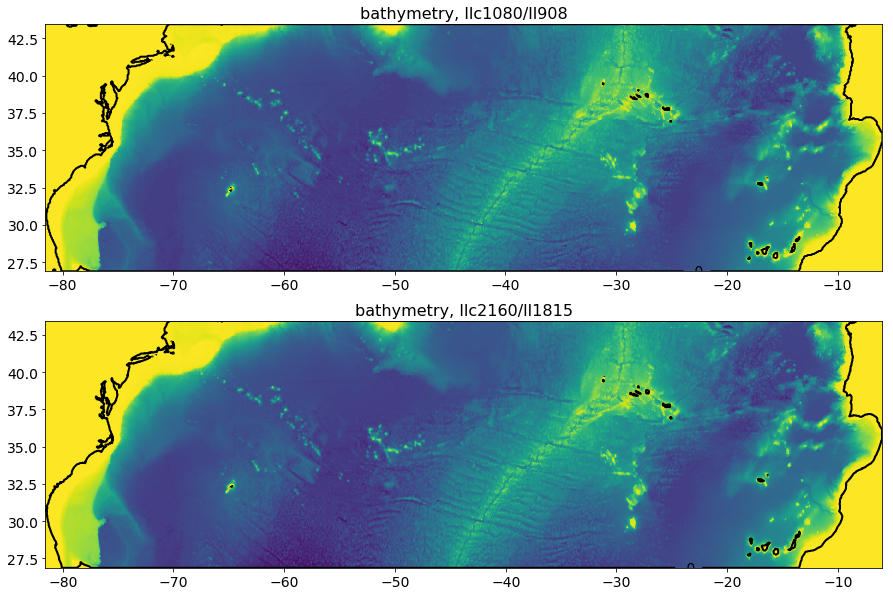

In [24]:
plt.figure(figsize=(15,10))

plt.subplot(211)
plt.pcolormesh(x,y,bathy908)
CS1=plt.contour(x,y,bathy908,levels = [-0.5,0.5], colors=('k',),linestyles=('-',),linewidths=(2,))
plt.clabel(CS1, fmt = '%2.1d', colors = 'k', fontsize=14);
plt.title('bathymetry, llc1080/ll908')

plt.subplot(212)
plt.pcolormesh(X,Y,bathy)
CS2=plt.contour(X,Y,bathy,levels = [-0.5,0.5], colors=('k',),linestyles=('-',),linewidths=(2,))
plt.clabel(CS2, fmt = '%2.1d', colors = 'k', fontsize=14);
plt.title('bathymetry, llc2160/ll1815')



In [30]:
def output_binary_file(data, fname, dtype=np.dtype('>f4')):
    data.astype(dtype).tofile(fname)

In [31]:
outdir = '/central/groups/oceanphysics/anirban/NA/experiments/ll908_01/inputfiles/'

In [32]:
output_binary_file(bathy908, os.path.join(outdir, 'bathy.bin'))

In [35]:
bathy.shape

(532, 1815)

In [20]:
365*24

8760

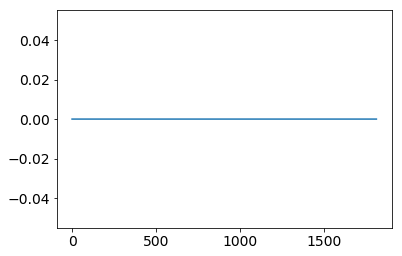

In [37]:
plt.plot(bathy[-1])

In [4]:
dir_wind = '/central/groups/oceanphysics/anirban/NA/inputfiles/era5_2008/'

In [5]:
era_wind08 = open(dir_wind+'ERA5_u10m_2008', 'rb')
u08 = np.fromfile(era_wind08, '>f4')
era_wind09 = open(dir_wind+'ERA5_u10m_2009', 'rb')
u09 = np.fromfile(era_wind09, '>f4')

In [6]:
u08.shape = (8784,640,1280)
u09.shape = (8760,640,1280)

In [7]:
from IPython import display
import time

In [8]:
figdir = 'movie_wind/'

In [84]:
Junedate = 14

junedateend09 = (31+28+31+30+31+Junedate)*24+23
junedatestart08 = (31+29+31+30+31+Junedate+1)*24

In [85]:
print(junedateend09, junedatestart08)

3983 4008


In [86]:
junedatestart08 - junedateend09

25

In [9]:
(31+28+31+30+31+15)*24

3984

In [25]:
ujj08 = u08[3984:3984+720,400:510,980:-1]
ujj09 = u09[3960:3960+720,400:510,980:-1]


In [69]:
usmall08 = u08[:,400:510,980:-1]
usmall09 = u09[:,400:510,980:-1]

In [70]:
usmall08.shape, usmall09.shape

((8784, 110, 299), (8760, 110, 299))

In [23]:
ujj08.shape, ujj09.shape

((360, 110, 299), (360, 110, 299))

In [108]:
Junedate = np.arange(11,50)
dates = ['Jun11','Jun12','Jun13','Jun14','Jun15','Jun16','Jun17','Jun18','Jun19','Jun20',
         'Jun21','Jun22','Jun23','Jun24','Jun25','Jun26','Jun27','Jun28','Jun29','Jun30',
        'Jul01','Jul02','Jul03','Jul04','Jul05','Jul06','Jul07','Jul08','Jul09','Jul10',
        'Jul11','Jul12','Jul13','Jul14','Jul15','Jul16','Jul17','Jul18','Jul19','Jul20',]


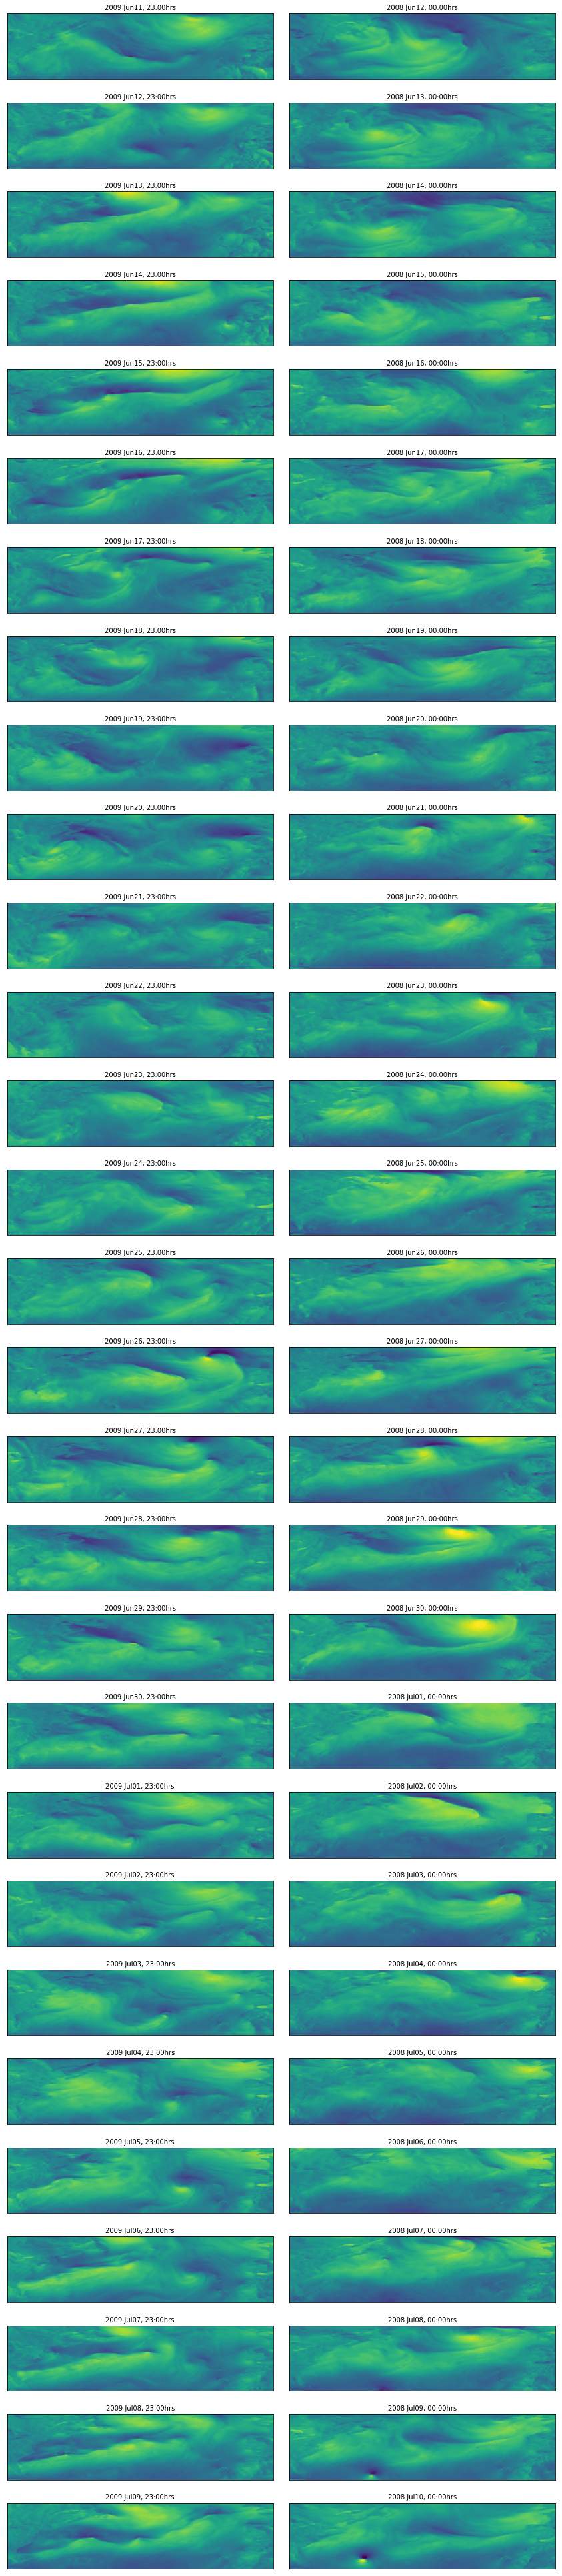

In [136]:
Junedate = np.arange(11,40)
dates = ['Jun11','Jun12','Jun13','Jun14','Jun15','Jun16','Jun17','Jun18','Jun19','Jun20',
         'Jun21','Jun22','Jun23','Jun24','Jun25','Jun26','Jun27','Jun28','Jun29','Jun30', 
         'Jul01','Jul02','Jul03','Jul04','Jul05','Jul06','Jul07','Jul08','Jul09','Jul10']
fig = plt.figure(figsize=(12,54))

for it in range(len(Junedate)):
    
    i = Junedate[it]
    junedateend09 = (31+28+31+30+31+i)*24+23
    junedatestart08 = (31+29+31+30+31+i+1)*24

    plt.subplot(len(Junedate), 2, 2*it+1)
    plt.pcolormesh(usmall09[junedateend09])
    plt.title('2009 %s, 23:00hrs' %dates[it], fontsize=10);
    plt.clim([-18,18]);
    plt.xticks([]);
    plt.yticks([]);
    
    plt.subplot(len(Junedate), 2, 2*it+2)
    plt.pcolormesh(usmall08[junedatestart08])
    plt.title('2008 %s, 00:00hrs' %dates[it+1], fontsize=10);
    plt.clim([-18,18]);
    plt.xticks([]);
    plt.yticks([]);
    plt.tight_layout()

fig.savefig('jumps_in_wind')

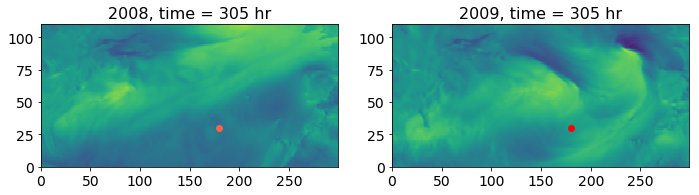

KeyboardInterrupt: 

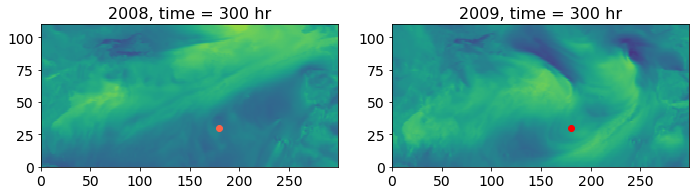

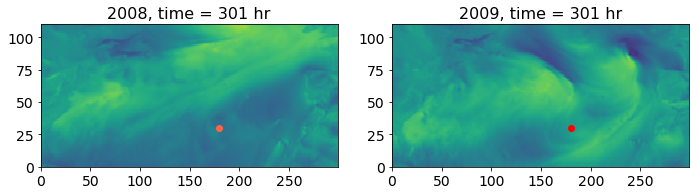

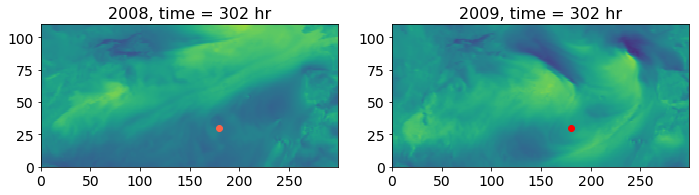

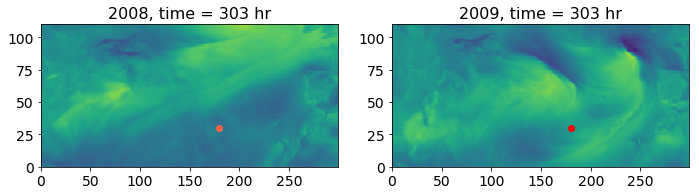

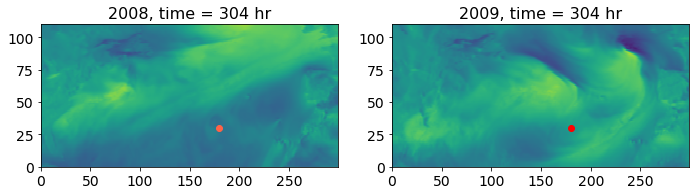

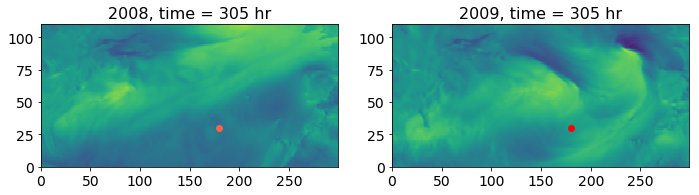

In [51]:
for i in range(300,550):
    plt.figure(figsize=(10,3))
    plt.subplot(121)
    plt.pcolormesh(ujj08[i]);
    plt.plot(180,30,'o', color=color1)
    #plt.colorbar();
    plt.clim([-21,21]);
    #plt.xticks([]);
    #plt.yticks([]);
    plt.title('2008, time = %s hr' %i)
    
    plt.subplot(122)
    plt.pcolormesh(ujj09[i]);
    plt.plot(180,30,'ro')
    #plt.colorbar();
    plt.clim([-21,21]);
    #plt.xticks([]);
    #plt.yticks([]);
    plt.title('2009, time = %s hr' %i)
    
    plt.tight_layout()
    #plt.savefig(figdir+'u10_%06d'%i)
    display.clear_output(wait=True)
    display.display(plt.gcf())

    time.sleep(1)

In [ ]:
for i in range(len(ujj08)):
    plt.figure(figsize=(10,6))

    plt.subplot(221)
    plt.pcolormesh(ujj08[i]);
    plt.plot(200,30,'o', color=color1)
    plt.plot(100,40,'o', color=color2)
    plt.plot(150,50,'o', color=color6)
    #plt.colorbar();
    plt.clim([-20,20]);
    plt.xticks([]);
    plt.yticks([]);
    plt.title('2008, time = %s hrs' %i)
    
    plt.subplot(222)
    plt.pcolormesh(ujj09[i]);
    plt.plot(200,30,'o', color=color1)
    plt.plot(100,40,'o', color=color2)
    plt.plot(150,50,'o', color=color6)
    plt.clim([-20,20]);
    plt.xticks([]);
    plt.yticks([]);
    plt.title('2009, time = %s hrs' %i)
    plt.subplot(223)
    plt.plot(ujj08[0:i,30,200], color=color1);
    plt.plot(ujj08[0:i,40,100], color=color2);
    plt.plot(ujj08[0:i,50,150], color=color6);
    plt.xlabel('time [hrs]')
    plt.grid()
    plt.ylim([-10,10])
    plt.xlim([-3,723])
    plt.subplot(224)
    plt.plot(ujj09[0:i,30,200], color=color1);
    plt.plot(ujj09[0:i,40,100], color=color2);
    plt.plot(ujj09[0:i,50,150], color=color6);
    plt.xlabel('time [hrs]')
    plt.grid()
    plt.ylim([-10,10])
    plt.xlim([-3,723])
    plt.yticks([-5,0,5],[])

    plt.tight_layout()
    plt.savefig(figdir+'u10_%06d'%i)

    display.clear_output(wait=True)
    display.display(plt.gcf())

    time.sleep(0.1)
    

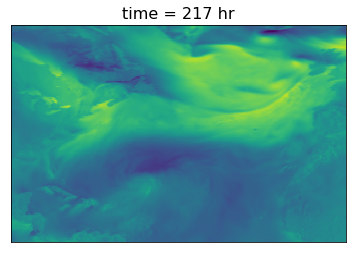

In [52]:
u_somelon = u10[:,500:600,1120]

In [53]:
u_somelon.shape

(8784, 100)

In [64]:
u0 = u10[:,550,1120]

In [65]:
u0.shape

(8784,)

In [66]:
u1 = np.roll(u0, 24)

In [70]:
u0[-24]

-4.380295

In [68]:
u1[0]

-4.380295

In [67]:
u1.shape

(8784,)

In [ ]:
plt.figure(figsize=(20,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    itertime = 8i
    plt.pcolormesh(u10[0,400:600,900:-1])

Text(0.5,0,'time [hrs]')

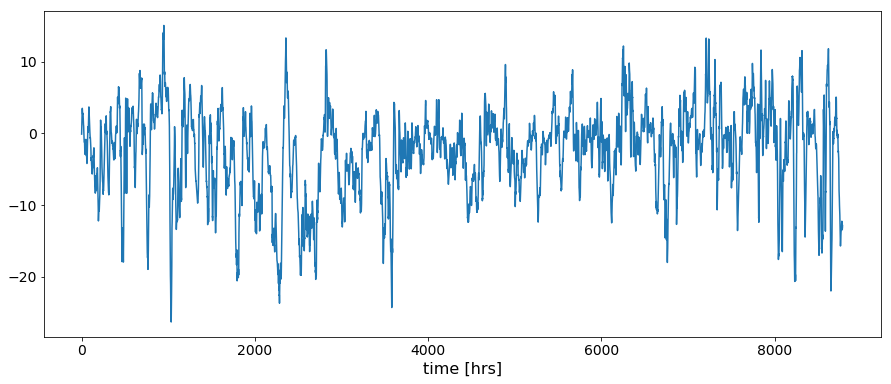

In [71]:
plt.figure(figsize=(15,6))

plt.plot(u_somelon.T[40]);
plt.xlabel('time [hrs]')

Text(0.5,0,'time [hrs]')

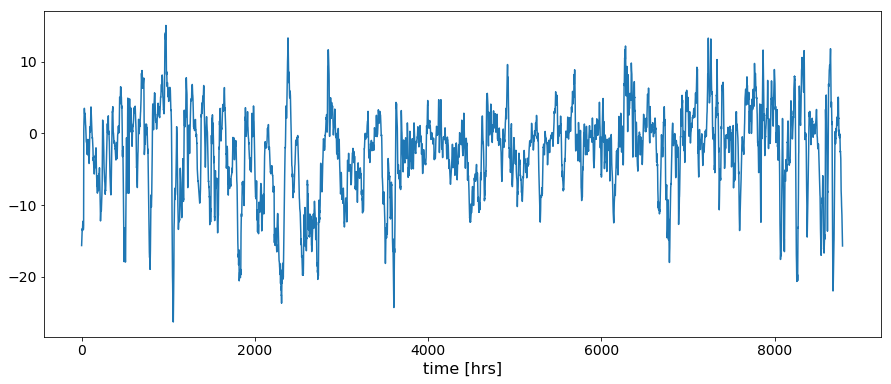

In [72]:
plt.figure(figsize=(15,6))

plt.plot(np.roll(u_somelon.T[40], 24));
plt.xlabel('time [hrs]')

In [73]:
np.roll(u_somelon.T[40], 24)[0]

-15.641037

In [75]:
u_somelon.T[40][-24]

-15.641037

(0, 48)

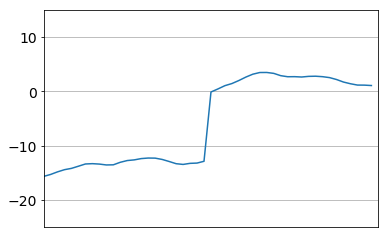

In [83]:
plt.plot(np.roll(u_somelon.T[40], 24)[0:48])
plt.grid()
plt.xticks([])
plt.ylim([-25,15])
plt.xlim([0,48])

ValueError: num must be 1 <= num <= 182, not 183

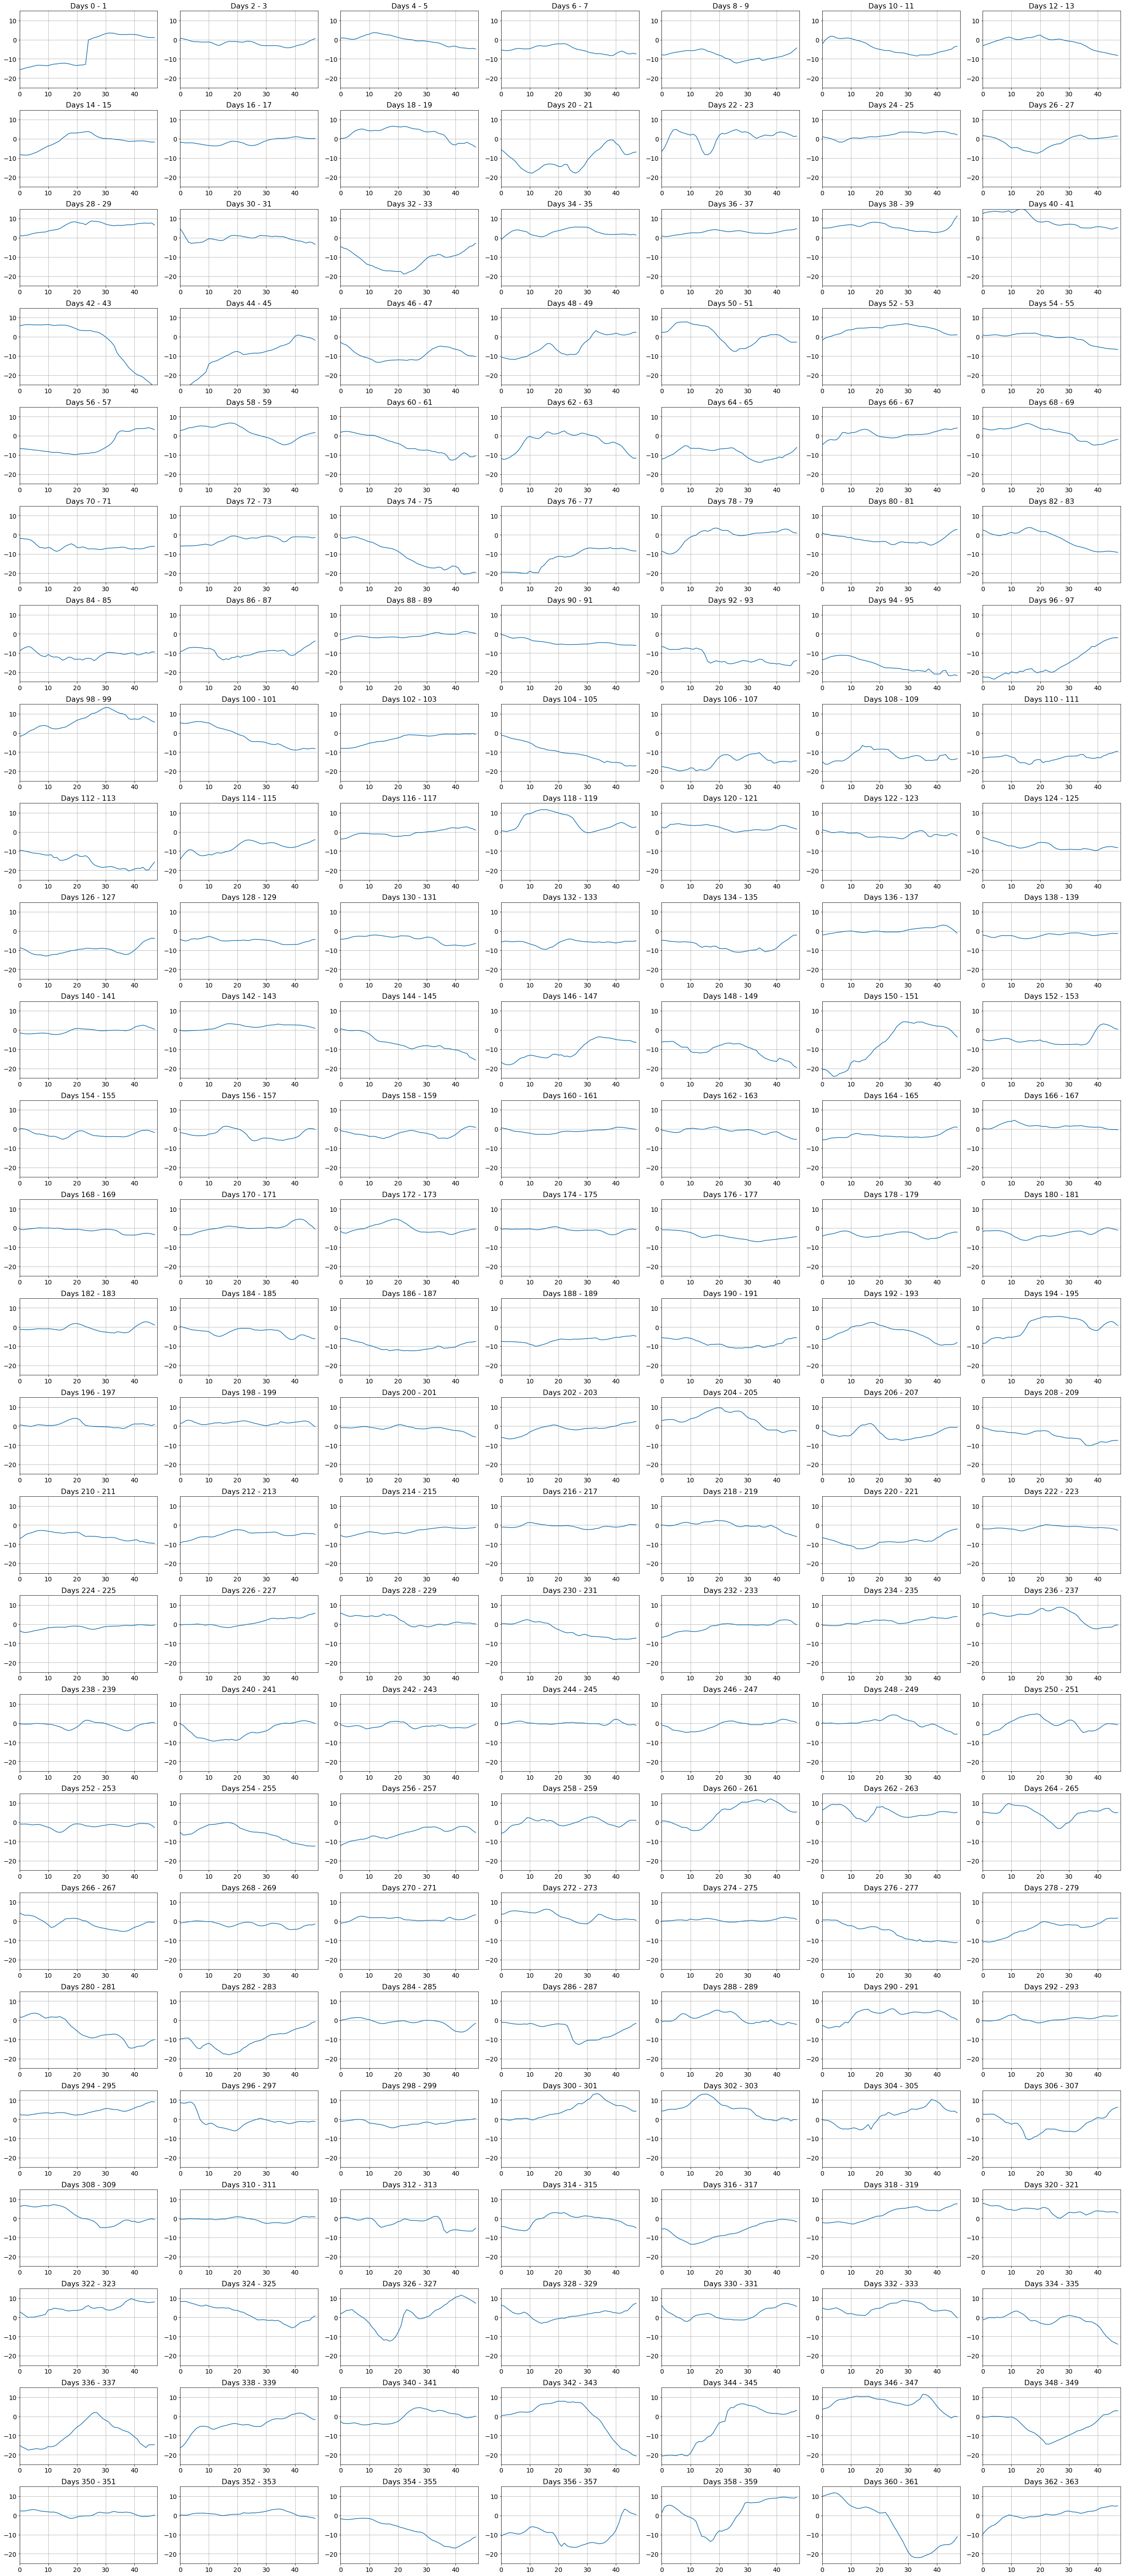

In [93]:
plt.figure(figsize=(35,80))
for i in range(184):
    plt.subplot(26,7,i+1)
    plt.plot(np.roll(u_somelon.T[40], 24)[i*48:i*48+48])
    plt.ylim([-25,15])
    plt.xlim([0,48])
    plt.grid()
    plt.title('Days %s - %s' %(i*2,i*2+1))
    plt.tight_layout()